In [0]:
pip install tensorflow

Python interpreter will be restarted.
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Not uninstalling typing-extensions at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-cfd4509a-0637-45e8-80ca-d52a84807804
    Can't uninstall 'typing-extensions'. No files were found to uninstall.
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.11.2
    Not uninstalling pygments at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-cfd4509a-0637-45e8-80ca-d52a84807804
    Can't uninstall 'Pygments'. No files were found to uninstall.
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Not uninstalling numpy at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-cfd4509a-0637-45e8-80ca-d52a84807804
    Can't un

In [0]:
%sql

use lakehouse

In [0]:
df = spark.read.format("delta").table("gold_tableforml")

In [0]:
df.count()

Out[30]: 12518

In [0]:
#display(df)

In [0]:
from pyspark.sql.functions import to_date, lit, months_between
import datetime 
# Create a literal representing today's date
current_date_lit = lit(datetime.date.today())

df = df.filter(months_between(current_date_lit, df['date_listed']) <= 6)

# df = df.filter(df['type'] == 'House')
# df = df.filter(df['address'] == 'Thành phố Thủ Đức')

In [0]:
df.count()

Out[33]: 12518

In [0]:
#display(df)

In [0]:
df = df.dropna()

In [0]:
df = df.toPandas()
print(df)

            type          address     area_m2  floor  bedroom  toilet  \
0          House    Quận Bình Tân   68.000000      4        4       5   
1          House     Quận Tân Phú   80.000000      0        5       4   
2          House      Quận Gò Vấp   40.000000      2        2       2   
3      Apartment  Quận Bình Thạnh   67.000000      0        2       2   
4          House           Quận 7  141.000000      5       11       7   
...          ...              ...         ...    ...      ...     ...   
12513      House      Quận Gò Vấp   43.200001      0        3       3   
12514       Land          Quận 12  125.000000      0        0       0   
12515      House      Quận Gò Vấp   20.000000      1        2       2   
12516  Apartment    Quận Bình Tân   64.000000      0        2       2   
12517      House    Quận Bình Tân   23.000000      2        2       2   

       furnishing_status legal_status  land_frontage  spacious_backyard  \
0      Không có nội thất     Đã có sổ           

In [0]:
df['price_per_square'] = df['price_per_square'] / 1000000

def round_to_two_decimals(number):
  return round(number, 0)

df['price_per_square'] = df['price_per_square'].apply(round_to_two_decimals)
print(df['price_per_square'])

0         90.0
1         94.0
2        112.0
3         54.0
4        206.0
         ...  
12513    122.0
12514     68.0
12515    140.0
12516     27.0
12517    102.0
Name: price_per_square, Length: 12518, dtype: float64


In [0]:
print(df['area_m2'].mean())

124.87656


In [0]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Xác định ngưỡng loại bỏ ngoại lai
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Loại bỏ các giá trị ngoại lai
df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

df = df_no_outliers

<command-3778191117927371>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


In [0]:
df = df.drop("price_vnd", axis=1)

In [0]:
display(df)

type address area_m2 floor bedroom toilet furnishing_status legal_status land_frontage spacious_backyard drive_way date_listed price_per_square House Quận Bình Tân 68.0 4 4 5 Không có nội thất Đã có sổ 0 0 0 2024-05-05 90.0 House Quận Tân Phú 80.0 0 5 4 Không có nội thất Đã có sổ 0 0 0 2024-05-10 94.0 House Quận Gò Vấp 40.0 2 2 2 Không có nội thất Đã có sổ 0 0 0 2024-05-10 112.0 Apartment Quận Bình Thạnh 67.0 0 2 2 Không có nội thất Không có sổ 0 0 0 2024-05-11 54.0 House Quận Gò Vấp 59.4 4 3 4 Không có nội thất Đã có sổ 0 0 0 2024-05-11 133.0 House Thành phố Thủ Đức 64.0 4 4 4 Không có nội thất Đã có sổ 0 0 0 2024-05-04 106.0 House Huyện Bình Chánh 75.0 0 5 5 Nội thất đầy đủ Đã có sổ 1 0 0 2024-05-03 193.0 House Quận Gò Vấp 80.0 0 5 0 Không có nội thất Đang chờ sổ 0 0 0 2024-05-03 138.0 House Quận Bình Thạnh 24.0 2 3 2 Hoàn thiện cơ bản Đã có sổ 0 0 0 2024-05-08 150.0 House Quận Tân Phú 80.0 4 5 5 Không có nội thất Đã có sổ 1 0 0 2024-05-05 138.0 House Quận 7 40.0 0 2 2 Hoàn thiện cơ bản Sổ chung / công chứng vi bằng 0 0 0 2024-05-07 50.0 Apartment Quận 12 65.0 0 2 0 Không có nội thất Hợp đồng mua bán 0 0 0 2024-05-10 35.0 House Thành phố Thủ Đức 139.0 1 3 3 Không có nội thất Không có sổ 1 0 0 2024-05-03 60.0 Apartment Quận Tân Phú 85.0 0 2 2 Không có nội thất Không có sổ 0 0 0 2024-05-06 60.0 House Quận 7 74.9 2 3 2 Không có nội thất Đã có sổ 1 0 0 2024-05-11 147.0 House Quận Bình Thạnh 10.0 1 1 1 Không có nội thất Đang chờ sổ 0 0 0 2024-05-03 120.0 Land Quận 7 80.0 0 0 0 Không có nội thất Đã có sổ 1 0 0 2024-05-10 109.0 Apartment Quận Tân Phú 86.0 0 2 0 Không có nội thất Đang chờ sổ 0 0 0 2024-05-06 28.0 House Quận Tân Bình 50.0 2 2 2 Không có nội thất Đã có sổ 1 0 0 2024-05-06 128.0 House Quận 12 82.0 5 5 5 Không có nội thất Đã có sổ 0 0 0 2024-05-10 143.0 House Quận 7 93.0 3 4 5 Nội thất đầy đủ Đã có sổ 1 0 0 2024-05-03 134.0 House Quận Tân Phú 72.0 0 4 0 Không có nội thất Đã có sổ 1 0 0 2024-05-08 132.0 House Quận Bình Tân 68.0 3 4 3 Nội thất đầy đủ Đã có sổ 0 0 0 2024-05-10 76.0 Land Quận Bình Tân 50.0 0 0 0 Không có nội thất Đã có sổ 1 0 0 2024-05-11 80.0 Apartment Quận Bình Thạnh 91.0 0 2 2 Không có nội thất Không có sổ 0 0 0 2024-05-10 58.0 House Quận 10 66.0 2 5 0 Hoàn thiện cơ bản Đã có sổ 0 0 0 2024-05-11 195.0 House Quận 11 58.0 6 4 5 Nội thất cao cấp Đã có sổ 0 0 0 2024-05-04 138.0 House Quận Gò Vấp 63.0 2 4 5 Nội thất đầy đủ Đã có sổ 0 0 0 2024-05-07 97.0 House Quận 12 36.0 0 2 0 Không có nội thất Đã có sổ 0 0 0 2024-05-11 46.0 House Quận 10 15.0 2 2 1 Không có nội thất Đã có sổ 0 0 0 2024-05-03 160.0 House Quận Tân Phú 62.0 0 4 5 Nội thất cao cấp Đã có sổ 0 0 0 2024-05-11 142.0 House Huyện Hóc Môn 152.0 0 3 2 Không có nội thất Đã có sổ 0 0 0 2024-05-11 23.0 House Quận Tân Bình 50.0 5 5 4 Nội thất đầy đủ Đã có sổ 0 0 0 2024-05-06 154.0 House Quận Bình Tân 30.0 2 2 2 Không có nội thất Đã có sổ 0 0 0 2024-05-11 83.0 House Thành phố Thủ Đức 75.0 2 2 1 Không có nội thất Đã có sổ 0 0 0 2024-05-03 76.0 House Quận Tân Phú 75.0 4 4 5 Nội thất cao cấp Đã có sổ 1 0 0 2024-05-10 90.0 House Huyện Nhà Bè 50.0 2 2 2 Không có nội thất Đã có sổ 0 0 0 2024-05-03 70.0 House Thành phố Thủ Đức 85.0 0 3 0 Không có nội thất Không có sổ 1 0 0 2024-05-03 65.0 Land Thành phố Thủ Đức 126.0 0 0 0 Không có nội thất Đã có sổ 1 0 0 2024-05-03 23.0 Land Huyện Củ Chi 110.0 0 0 0 Không có nội thất Đã có sổ 1 0 0 2024-05-07 15.0 House Quận Bình Tân 90.0 5 6 7 Không có nội thất Đã có sổ 0 0 0 2024-05-03 90.0 House Huyện Bình Chánh 100.0 2 2 2 Không có nội thất Đã có sổ 1 0 0 2024-05-11 6.0 House Quận Tân Bình 49.0 3 4 3 Không có nội thất Đã có sổ 0 0 0 2024-05-03 94.0 House Quận 7 127.9 1 2 1 Không có nội thất Đã có sổ 0 0 0 2024-05-11 39.0 House Quận Bình Thạnh 50.0 4 4 4 Nội thất đầy đủ Đã có sổ 0 0 0 2024-05-10 50.0 House Quận Bình Thạnh 24.0 2 2 2 Nội thất đầy đủ Đã có sổ 0 0 0 2024-05-03 148.0 Apartment Quận 8 60.0 0 2 2 Không có nội thất Sổ hồng riêng 0 0 0 2024-05-06 42.0 House Quận Gò Vấp 40.5 2 3 3 Nội thất đầy đủ Đã có sổ 0 0 0 2024-05

In [0]:
print(df['area_m2'].max())
print(df['price_per_square'].max())
#print(df['price_vnd'].max())

165.0
226.0


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from keras.models import Sequential
#from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [0]:
label_encoder = LabelEncoder()
df['address'] = label_encoder.fit_transform(df['address'])
df['furnishing_status'] = label_encoder.fit_transform(df['furnishing_status'])
df['type'] = label_encoder.fit_transform(df['type'])
df['legal_status'] = label_encoder.fit_transform(df['legal_status'])
print(df)

       type  address     area_m2  floor  bedroom  toilet  furnishing_status  \
0         1       16   68.000000      4        4       5                  2   
1         1       20   80.000000      0        5       4                  2   
2         1       17   40.000000      2        2       2                  2   
3         0       15   67.000000      0        2       2                  2   
6         1       17   59.400002      4        3       4                  2   
...     ...      ...         ...    ...      ...     ...                ...   
12513     1       17   43.200001      0        3       3                  2   
12514     2        8  125.000000      0        0       0                  2   
12515     1       17   20.000000      1        2       2                  3   
12516     0       16   64.000000      0        2       2                  4   
12517     1       16   23.000000      2        2       2                  2   

       legal_status  land_frontage  spacious_backya

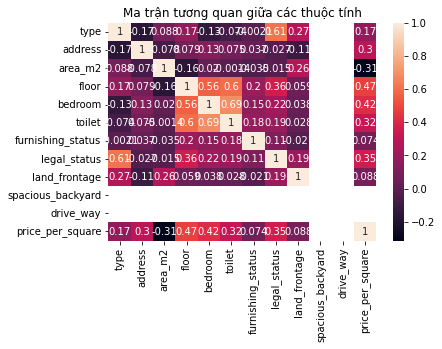

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns


correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Ma trận tương quan giữa các thuộc tính")
plt.show()

In [0]:
# 
X = df[["type","address","floor","furnishing_status","legal_status","bedroom","toilet","land_frontage"]]
y = df['price_per_square']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [0]:
X_train.count()
X_test.count()
X_val.count()

Out[60]: type                 2444
address              2444
floor                2444
furnishing_status    2444
legal_status         2444
bedroom              2444
toilet               2444
land_frontage        2444
dtype: int64

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
#optimizer= tf.keras.optimizers.Adam(0.001)

/local_disk0/.ephemeral_nfs/envs/pythonEnv-cfd4509a-0637-45e8-80ca-d52a84807804/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2626.5642 - mae: 37.9086 - val_loss: 1358.1953 - val_mae: 27.2329
Epoch 2/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1339.3964 - mae: 27.8316 - val_loss: 1119.8738 - val_mae: 25.6335
Epoch 3/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1264.0242 - mae: 27.1453 - val_loss: 1178.9929 - val_mae: 25.7943
Epoch 4/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1174.6605 - mae: 26.1123 - val_loss: 1261.9912 - val_mae: 25.5278
Epoch 5/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1159.0033 - mae: 25.9866 - val_loss: 1057.9146 - val_mae: 25.

*** WARNING: max output size exceeded, skipping output. ***

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 849.2953 - mae: 21.7707 - val_loss: 797.0140 - val_mae: 20.9991
Epoch 46/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 826.4671 - mae: 21.5295 - val_loss: 804.0745 - val_mae: 21.2748
Epoch 47/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 805.1287 - ma

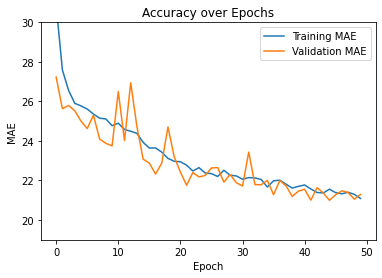

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 8263.9424 - mae: 78.2523 - val_loss: 3178.4556 - val_mae: 46.1715
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2612.4016 - mae: 40.6960 - val_loss: 1748.2946 - val_mae: 31.7732
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1718.3781 - mae: 31.6720 - val_loss: 1421.8097 - val_mae: 29.2601
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1441.0248 - mae: 29.1150 - val_loss: 1284.3075 - val_mae: 27.7812
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1287.4332 - mae: 27.5991 - val_loss: 1240.1857 - val_mae: 27.3497
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1322.3068 - mae: 27.8969 - val_loss: 1206.6168 - val_mae: 26.4218
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1259.4976 - mae: 27.0867 - val_loss: 1179.8123 - val_mae: 26.3526
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1253.9878 - mae: 27.1624 - val_loss: 1180.6495 - val_mae: 26.6406
Epoch 9

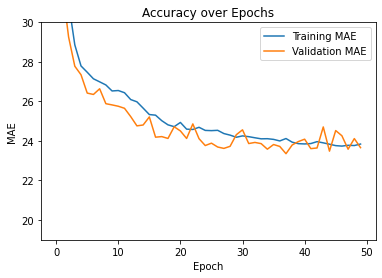

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5237.5371 - mae: 57.1684 - val_loss: 1370.7092 - val_mae: 28.0836
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1416.8552 - mae: 28.7983 - val_loss: 1215.0446 - val_mae: 27.0989
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1284.1155 - mae: 27.9340 - val_loss: 1172.3704 - val_mae: 26.0135
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1235.9961 - mae: 26.8817 - val_loss: 1140.4180 - val_mae: 26.5320
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1236.2535 - mae: 26.8274 - val_loss: 1108.0894 - val_mae: 25.9612
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1207.4039 - mae: 26.4429 - val_loss: 1059.1332 - val_mae: 24.5004
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1157.6746 - mae: 25.7672 - val_loss: 1042.9728 - val_mae: 24.6567
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1086.1658 - mae: 24.9421 - val_loss: 1017.4521 - val_mae: 24.0434
Epoch 9/

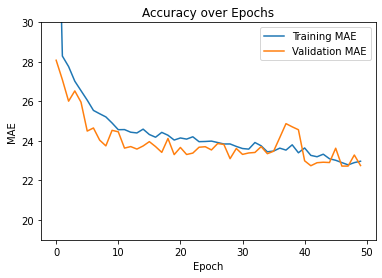

In [0]:

batch_size_list = {8, 64, 256}
for x in batch_size_list:
    model = Sequential()
    model.add(Dense(8, input_shape=(X_train.shape[1],)))  # Input layer
    model.add(Dense(32, activation="relu"))  # Hidden layer
    #model.add(Dense(32, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(1))
    model.compile(loss=MeanSquaredError(), optimizer=Adam(0.001), metrics=["mae"])
    history = model.fit(X_train, y_train, batch_size= x, epochs=50, validation_data=(X_val, y_val))

    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.ylim(19, 30)
    plt.legend()
    plt.show()   

In [0]:
model = Sequential()
model.add(Dense(8, input_shape=(X_train.shape[1],)))  # Input layer
model.add(Dense(32, activation="relu"))  # Hidden layer
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.008), metrics=["mae"])
history = model.fit(X_train, y_train, batch_size= 8, epochs=50, validation_data=(X_val, y_val))


Epoch 1/50


/local_disk0/.ephemeral_nfs/envs/pythonEnv-cfd4509a-0637-45e8-80ca-d52a84807804/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


896/896 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2323.6541 - mae: 35.4000 - val_loss: 1315.9648 - val_mae: 26.6022
Epoch 2/50
896/896 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1233.4148 - mae: 26.5898 - val_loss: 1218.5137 - val_mae: 25.4906
Epoch 3/50
896/896 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1171.0591 - mae: 25.7405 - val_loss: 1065.7938 - val_mae: 24.2527
Epoch 4/50
896/896 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1169.2922 - mae: 26.2098 - val_loss: 1059.1669 - val_mae: 25.1770
Epoch 5/50
280/896 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1164.0817 - mae: 25.5995

*** WARNING: max output size exceeded, skipping output. ***

896/896 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 752.7693 - mae: 20.4968 - val_loss: 823.2179 - val_mae: 21.1791
Epoch 47/50
896/896 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 763.0245 - mae: 20.6190 - val_loss: 779.5739 - val_mae: 20.6430
Epoch 48/50
896/896 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 774.5333 - ma

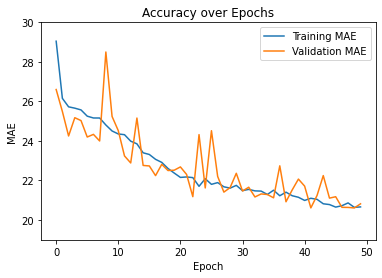

In [0]:
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.ylim(19, 30)
plt.legend()
plt.show()

In [0]:
y_predict = model.predict(X_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [0]:
def plot_results(y_train, y_pred):
    plt.figure(figsize=(14, 7))

    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
    plt.xlabel('Actual Price per Square')
    plt.ylabel('Predicted Price per Square')
    plt.title('Neuron')

    plt.tight_layout()
    plt.show()

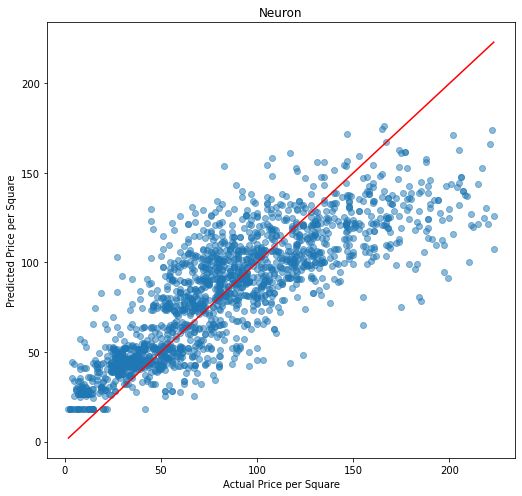

In [0]:
plot_results(y_test, y_predict)